## EDA ON INGESTED DATA

In [1]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Initialize Binance API
binance = ccxt.binance()

def fetch_ohlcv(symbol, timeframe, since=None, limit=1000):
    ohlcv = binance.fetch_ohlcv(symbol, timeframe, since=since, limit=limit)
    return ohlcv

def ohlcv_to_dataframe(ohlcv):
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Fetch data
symbol = 'BTC/USDT'
timeframe = '1h'
since = binance.parse8601('2023-01-01T00:00:00Z')  # Start date
ohlcv = fetch_ohlcv(symbol, timeframe, since)

# Convert to DataFrame
df = ohlcv_to_dataframe(ohlcv)

# Display the first few rows of the DataFrame
df.head()


,timestamp,open,high,low,close,volume
0,2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.83570
1,2023-01-01 01:00:00,16529.59,16556.80,16525.78,16551.47,3590.06669
2,2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038
3,2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050
4,2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909


In [2]:
df.describe()

,timestamp,open,high,low,close,volume
count,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2023-01-21 19:29:59.999999744,20842.593660,20908.737360,20777.44050,20847.793390,11074.398736
min,2023-01-01 00:00:00,16513.330000,16534.030000,16499.01000,16513.340000,2607.107500
25%,2023-01-11 09:45:00,17439.917500,17461.775000,17407.83500,17441.095000,6798.787183
50%,2023-01-21 19:30:00,21740.065000,21795.250000,21685.22000,21741.635000,9102.759690
75%,2023-02-01 05:15:00,23003.650000,23080.587500,22931.19000,23003.897500,13111.481182
max,2023-02-11 15:00:00,24188.090000,24255.000000,23946.59000,24189.850000,66759.623940
std,NaN,2606.271842,2623.693167,2582.23329,2602.892574,6931.750637


# Time Series Plot of Closing Prices

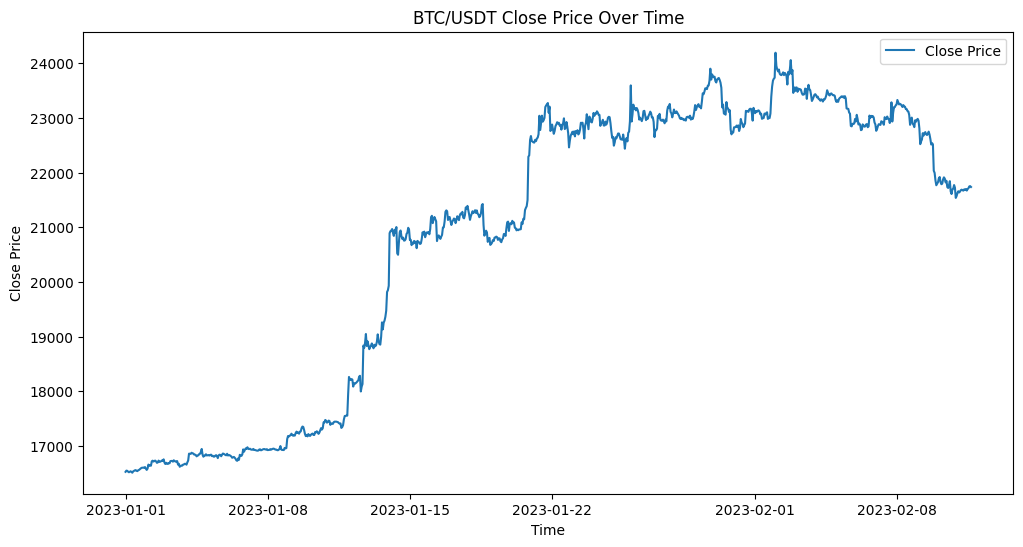

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Close Price')
plt.title('BTC/USDT Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Volume Over Time

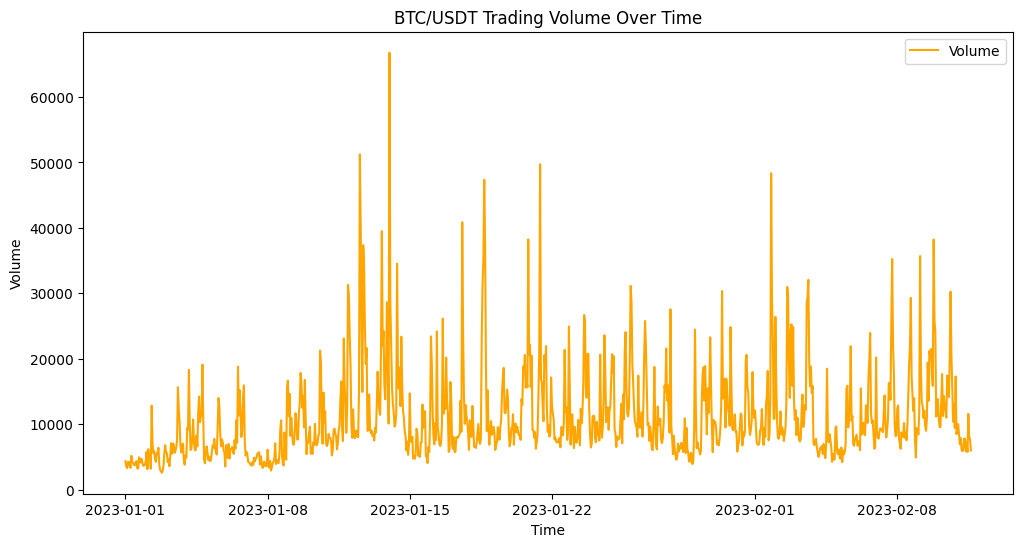

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['volume'], label='Volume', color='orange')
plt.title('BTC/USDT Trading Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Distribution of Closing Prices

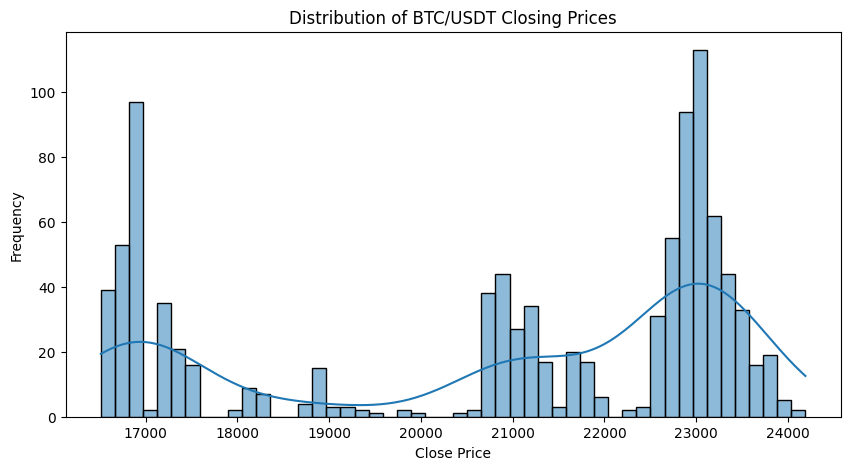

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of BTC/USDT Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Prices to Detect Outliers

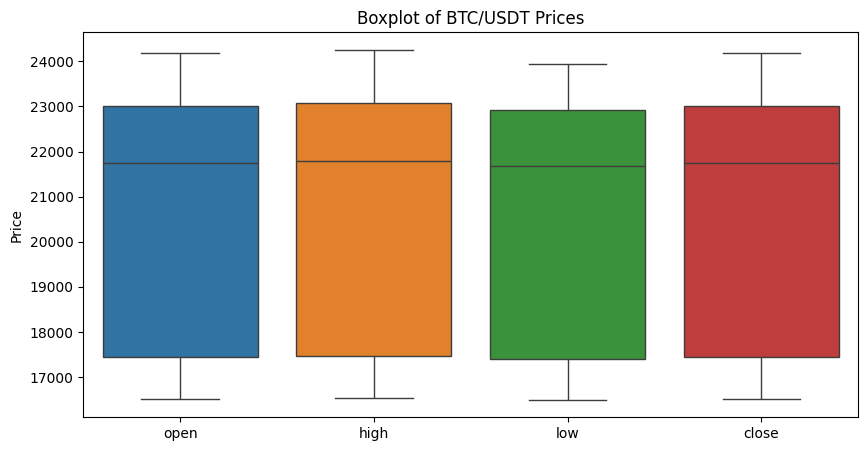

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['open', 'high', 'low', 'close']])
plt.title('Boxplot of BTC/USDT Prices')
plt.ylabel('Price')
plt.show()

# Correlation Matrix

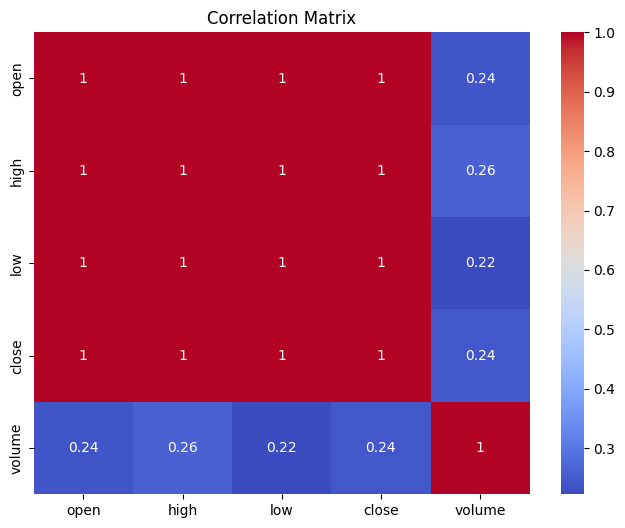

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Moving Average of Closing Prices

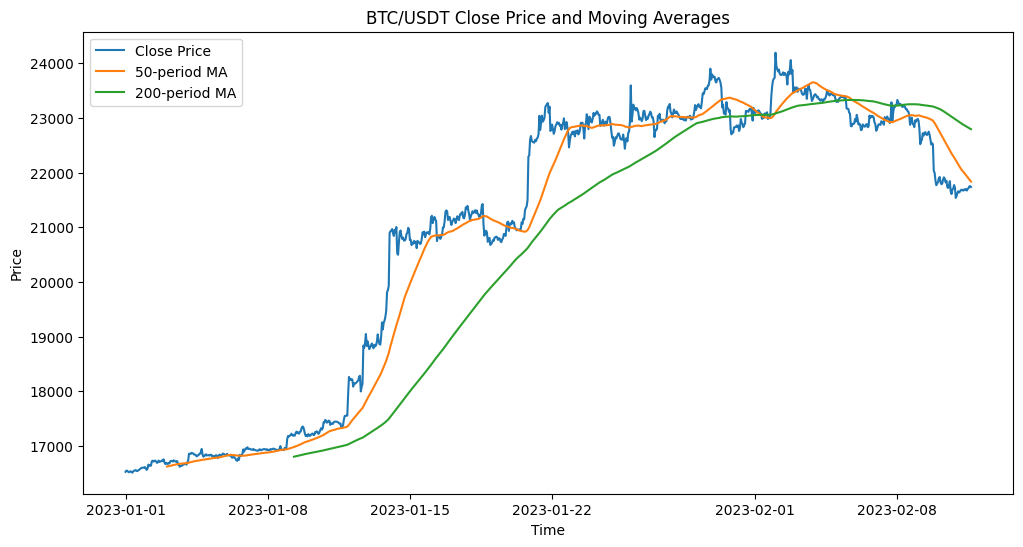

In [8]:
df['MA50'] = df['close'].rolling(window=50).mean()
df['MA200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Close Price')
plt.plot(df['timestamp'], df['MA50'], label='50-period MA')
plt.plot(df['timestamp'], df['MA200'], label='200-period MA')
plt.title('BTC/USDT Close Price and Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()